In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *

In [11]:
def util(x):
    return(np.log(1 + x))

def prob_t_is_max(max_so_far, t, T):
    coeff = 1.0/(T - t)
    prod = (1.0 - np.power(norm.cdf(max_so_far), T-t))
    return(coeff*prod)

def prob_any_next_t_is_max(max_so_far, t, T):
    prod = (1.0 - np.power(norm.cdf(max_so_far), T-t))
    return(prod)

def opt_util(p_t, pi_cp, xbar=1.0):
    #g(x) = log(1 + x), x in [0,xbar]
    x = (1.0/(pi_cp * p_t)) - 1.0
    if x > xbar:
        x = xbar
    if x < 0:
        x = 0
    return(x)

In [ ]:
T = 10
ramp_const = 0.1
system_noise_var = 1.0
x_bar = 1.0
pi_cp = 2.0

max_so_far = 0

for t in range(T):
    p_t = prob_t_is_max(max_so_far, t, T)
    opt = opt_util 
    

In [108]:
#T = 3

MC = 1000
max_s_f = 0
noise_var = 1.0
g = np.arange(0,1.0,0.05)
ramp_const = 0.5
pi_cp = 1.2


RT_mc = []
r1_mc = []
r1s_mc = np.zeros((20,20,20))
r2_mc = []
r3_mc = []
solutions = []

for i in range(MC):
    
    #initialize max_s_f
    max_s_f = 0.0
    
    if i%100 == 0:
        print(i)
    #g(x) = log(1 + x)
    #step one
    p = (1.0/3.0)*prob_any_next_t_is_max(max_s_f, 0, 3)
    max_r1 = 0.0
    max_r1_p = [0.0, 0.0, 0.0]
    for i in range(g.shape[0]):
        for j in range(g.shape[0]):
            for k in range(g.shape[0]):
                point = [g[i], g[j], g[k]]
                x1 = point[0]
                x2 = point[1]
                x3 = point[2]
                if np.abs(g[i] - g[j]) > ramp_const:
                    pass
                elif np.abs(g[j] - g[k]) > ramp_const:
                    pass
                else:
                    r1 = np.log(1 + x1) + np.log(1 + x2) + np.log(1 + x3) - pi_cp*p*(x1 + x2 + x3)
                    if r1 > max_r1:
                        max_r1 = r1
                        max_r1_p = point
                    r1s_mc[i,j,k] = r1
    s_1 = np.random.normal(0,1)
    max_s_f = s_1
    #if s_1 > max_s_f:  #do we update no matter what s_1 is or do we keep it at 0?
    #    max_s_f = s_1
                    
    #step two
    x1star = max_r1_p[0]
    p = (1.0/2.0)*prob_any_next_t_is_max(max_s_f, 1, 3)
    max_r2 = 0.0
    max_r2_p = [x1star, 0.0, 0.0]
    for j in range(g.shape[0]):
        for k in range(g.shape[0]):
            point = [x1star, g[j], g[k]]
            x2 = point[1]
            x3 = point[2]
            if np.abs(x1star - g[j]) > ramp_const:
                pass
            elif np.abs(g[j] - g[k]) > ramp_const:
                pass
            else:
                r2 = np.log(1 + x1star) + np.log(1 + x2) + np.log(1 + x3) - pi_cp*((1 - 2*p)*x1star + p*x2 + p*x3)
                if r2 > max_r2:
                    max_r2 = r2
                    max_r2_p = point
    s_2 = np.random.normal(0,1)
    if s_2 > max_s_f:
        max_s_f = s_2
    r2_mc.append(r2)
    
    #step three
    x2star = max_r2_p[1]
    plays_so_far = [x1star, x2star]
    max_noise_t = np.argmax([s_1, s_2])
    p = prob_any_next_t_is_max(max_s_f, 2, 3)
    max_r3 = 0.0
    max_r3_p = [x1star, x2star, 0.0]
    for k in range(g.shape[0]):
        point = [x1star, x2star, g[k]]
        x3 = point[2]
        if np.abs(x2star - g[k]) > ramp_const:
            pass
        else:
            r3 = np.log(1 + x1star) + np.log(1 + x2star) + np.log(1 + x3) - pi_cp*((1 - p)*plays_so_far[max_noise_t] + p*x3 )
            if r3 > max_r3:
                max_r3 = r3
                max_r3_p = point
    s_3 = np.random.normal(0,1)
    if s_3 > max_s_f:
        max_s_f = s_3
    r3_mc.append(r3)
    
    x3star = max_r3_p[2]
    plays_so_far.append(x3star)
    s = [s_1, s_2, s_3]
    max_noise_t = np.argmax(s)
    
    R = np.log(1 + x1star) + np.log(1 + x2star) + np.log(1 + x3star) - pi_cp*(plays_so_far[max_noise_t])
    RT_mc.append(R)
    solutions.append([x1star, x2star, x3star])
                    
    

0
100
200
300
400
500
600
700
800
900


In [97]:
xb = 0.0
best_case = 2*np.log(2) + np.log(1 + xb) - pi_cp*xb
print(best_case)

1.3862943611198906


In [98]:
fixed = 1.0
fixed_case = 3*np.log(1 + fixed) - pi_cp*fixed
print(fixed_case)

0.8794415416798358


In [99]:
np.min(RT_mc)

0.2407791804317807

In [100]:
np.max(RT_mc)

1.1672223015837941

In [101]:
np.mean(RT_mc)

0.9016837545769484

In [102]:
np.median(RT_mc)

0.8634881177269667

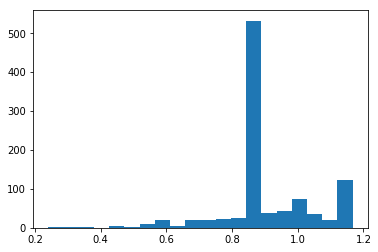

In [105]:
plt.hist(RT_mc, bins=20)
plt.show()

In [113]:
sols = np.asarray(solutions)

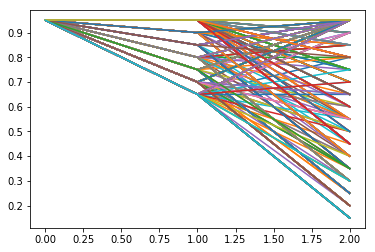

In [115]:
plt.plot(sols.T)
plt.show()

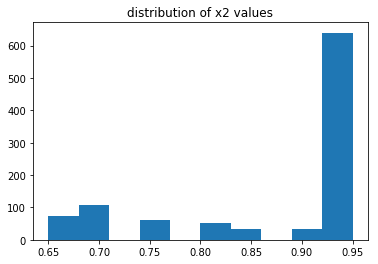

In [121]:
plt.hist(sols[:,1])
plt.title("distribution of x2 values")
plt.show()

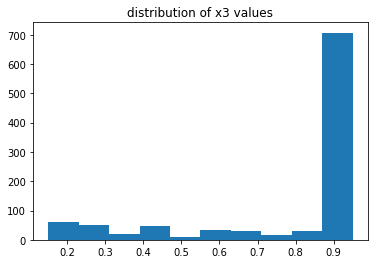

In [122]:
plt.hist(sols[:,2])
plt.title("distribution of x3 values")
plt.show()

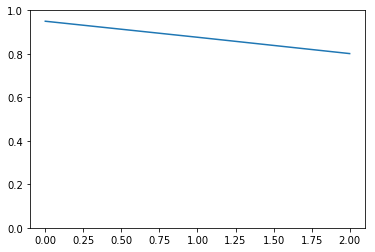

In [124]:
plt.plot(np.mean(sols, axis=0))
plt.ylim(0,1)
plt.show()